In [6]:
#Step 1 Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [8]:
df=pd.read_csv(r"C:\Users\CVR\Desktop\22B81A1292\28-03-25\fashion-mnist_test.csv")

In [12]:
# Separate labels and features
labels = df['label']
X = df.drop(columns=['label'])

In [14]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [16]:
# Apply PCA to reduce dimensionality before t-SNE
pca = PCA(n_components=50)  # Retain most variance while reducing noise
X_pca = pca.fit_transform(X_scaled)

In [18]:
# Apply t-SNE for 2D projection
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_pca)

In [19]:
# Convert to DataFrame for visualization
tsne_df = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2'])
tsne_df['label'] = labels

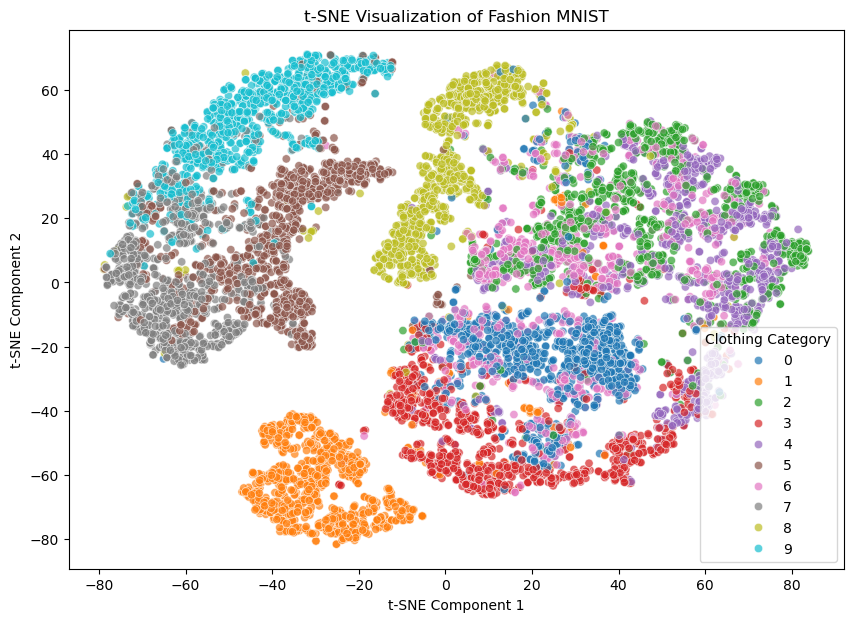

In [20]:

# Plot the t-SNE visualization
plt.figure(figsize=(10, 7))
sns.scatterplot(data=tsne_df, x='TSNE1', y='TSNE2', hue=tsne_df['label'], palette='tab10', alpha=0.7)
plt.title('t-SNE Visualization of Fashion MNIST')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Clothing Category')
plt.show()
